# Sarcasm Classification 

In [1]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-09-14 13:25:37--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.67.155, 142.250.199.155, 142.250.183.59, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.67.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: 'sarcasm.json.1'

     0K .......... .......... .......... .......... ..........  0%  198K 28s
    50K .......... .......... .......... .......... ..........  1%  191K 28s
   100K .......... .......... .......... .......... ..........  2%  591K 21s
   150K .......... .......... .......... .......... ..........  3%  388K 19s
   200K .......... .......... .......... .......... ..........  4% 1.01M 16s
   250K .......... .......... .......... .......... ..........  5%  617K 15s
   300K .......... .......... .......... .......... ..........  6%  934K 13s
   350K .......... .......... ......

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
with open("./sarcasm.json",'r') as file:
    datastore = json.load(file)
sentences = []
labels = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
print(f"total number of sentences : {len(sentences)}")
print(f"total number of labels : {len(labels)}")
# Printing the first examples 
print(f"first example sentence: {sentences[0]}")
print(f"first example label : {labels[0]}")

total number of sentences : 26709
total number of labels : 26709
first example sentence: former versace store clerk sues over secret 'black code' for minority shoppers
first example label : 0


In [30]:
def train_test_split(training_size,sentences,labels):
    train_sentences = sentences[:training_size]
    train_labels = labels[:training_size]
    
    valid_sentences = sentences[training_size:]
    valid_labels = labels[training_size:]
    return train_sentences,train_labels,valid_sentences,valid_labels

train_sentences ,train_labels,valid_sentences,valid_labels = train_test_split(20000,sentences,labels)

In [48]:
tokenizer = Tokenizer(num_words = 10000,oov_token = '<OOv>')
tokenizer.fit_on_texts(train_sentences)
word_indx = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_sentences)
padding = pad_sequences(sequences,maxlen = 32,padding = 'post')
print(f"no . of tokens present {len(word_indx)}")
print(f"first example original : {train_sentences[0]}")
print(f"first example sequence : {sequences[0]}")
print(f"first example padded : {padding[0]}")

# Test set
test_seq = tokenizer.texts_to_sequences(valid_sentences)
test_pad = pad_sequences(test_seq,maxlen = 32,padding = 'post')
print()
print(f"original example test : {valid_sentences[0]}")
print(f"sequence test example : {test_seq[0]}")
print(f"padding test example :{test_pad[0]}")


# Convert the labels into numpy array
train_labels = np.array(train_labels)
valid_labels = np.array(valid_labels)

no . of tokens present 25637
first example original : former versace store clerk sues over secret 'black code' for minority shoppers
first example sequence : [328, 1, 799, 3405, 2404, 47, 389, 2214, 1, 6, 2614, 8863]
first example padded : [ 328    1  799 3405 2404   47  389 2214    1    6 2614 8863    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]

original example test : pediatricians announce 2011 newborns are ugliest babies in 30 years
sequence test example : [1, 1100, 6663, 9423, 30, 1, 2439, 5, 519, 109]
padding test example :[   1 1100 6663 9423   30    1 2439    5  519  109    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0]


In [55]:
# Model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000,16,input_length = 32),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(loss='binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_2   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 24)                408       
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [58]:
history = model.fit(padding,train_labels,epochs=10,validation_data=(test_pad,valid_labels),verbose = 1)

Epoch 1/10
625/625 [==============================] - 7s 5ms/step - loss: 0.5689 - accuracy: 0.7043 - val_loss: 0.3996 - val_accuracy: 0.8386
Epoch 2/10
625/625 [==============================] - 3s 4ms/step - loss: 0.3139 - accuracy: 0.8732 - val_loss: 0.3413 - val_accuracy: 0.8568
Epoch 3/10
625/625 [==============================] - 2s 4ms/step - loss: 0.2363 - accuracy: 0.9067 - val_loss: 0.3409 - val_accuracy: 0.8498
Epoch 4/10
625/625 [==============================] - 2s 4ms/step - loss: 0.1920 - accuracy: 0.9278 - val_loss: 0.3525 - val_accuracy: 0.8550
Epoch 5/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1596 - accuracy: 0.9414 - val_loss: 0.3798 - val_accuracy: 0.8474
Epoch 6/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1351 - accuracy: 0.9517 - val_loss: 0.4061 - val_accuracy: 0.8466
Epoch 7/10
625/625 [==============================] - 3s 4ms/step - loss: 0.1160 - accuracy: 0.9606 - val_loss: 0.4534 - val_accuracy: 0.8402
Epoch 

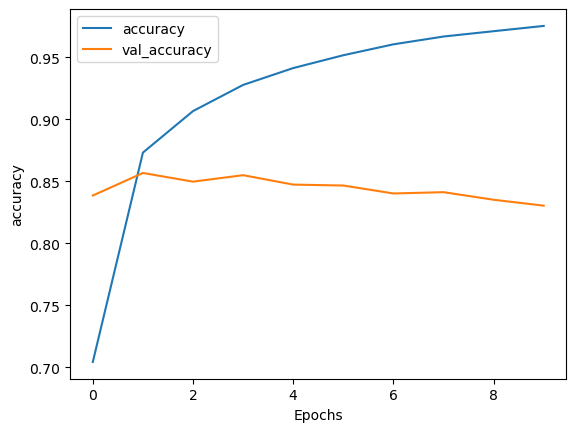

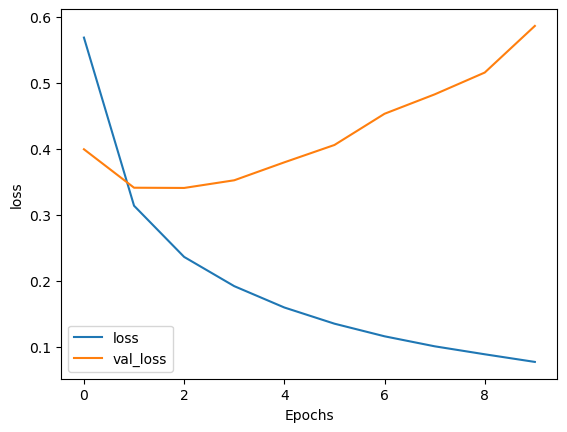

In [59]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")